### Note: check SETP-2019/aster-dem/VNIR_2019.19764706; SETP-2019/aster-dem/VNIR_2019.78629604
###             SETP-2019/aster-dem/VNIR_2019.88481241


In [8]:
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from utils.imgs_in_extent import imgs_in_extent
from utils.lay_stack import lay_stack


In [9]:
path_srtm = 'data/dem-data/srtm-c/SRTMGL1_E.tif'
path_setp_rgi60 = 'data/rgi60/rgi60_setp.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'


In [13]:
srtm, srtm_info = readTiff(path_srtm)
print(srtm.shape)


(18000, 28800)


In [6]:
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'tandem_setp.tif' data/dem-data/tandem-x/TDM1_DEM*/DEM/*DEM.tif
tandem, tandem_info = readTiff('tandem_setp.tif')

In [7]:
rgi60, rgi60_info = readTiff('data/rgi60/rgi60_setp_mask.tif')


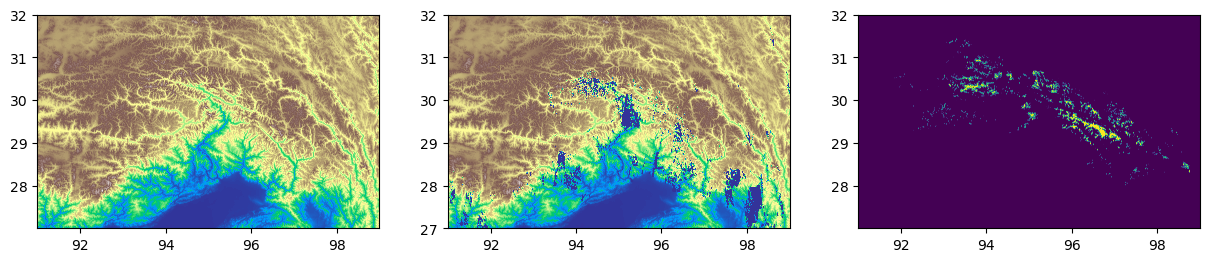

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(dem_srtm, vmax=7000, vmin=0, extent=dem_srtm_info['geoextent'], cmap='terrain')
plt.subplot(1,3,2)
plt.imshow(tandem, vmax=7000, vmin=0, extent=tandem_info['geoextent'], cmap='terrain')
plt.subplot(1,3,3)
plt.imshow(rgi60, extent=rgi60_info['geoextent'])


In [9]:
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2006' data/aster-stereo/SETP-2006/tiles-dem/*/dems_mosaic_subs.tif
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2007' data/aster-stereo/SETP-2007/tiles-dem/*/dems_mosaic_subs.tif
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2008' data/aster-stereo/SETP-2008/tiles-dem/*/dems_mosaic_subs.tif
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2009' data/aster-stereo/SETP-2009/tiles-dem/*/dems_mosaic_subs.tif


In [10]:
dem_2006, dem_2006_info = readTiff('dem_setp_2006')
dem_2007, dem_2007_info = readTiff('dem_setp_2007')
dem_2008, dem_2008_info = readTiff('dem_setp_2008')
dem_2009, dem_2009_info = readTiff('dem_setp_2009')
print(dem_2006.shape)


(17234, 24127)


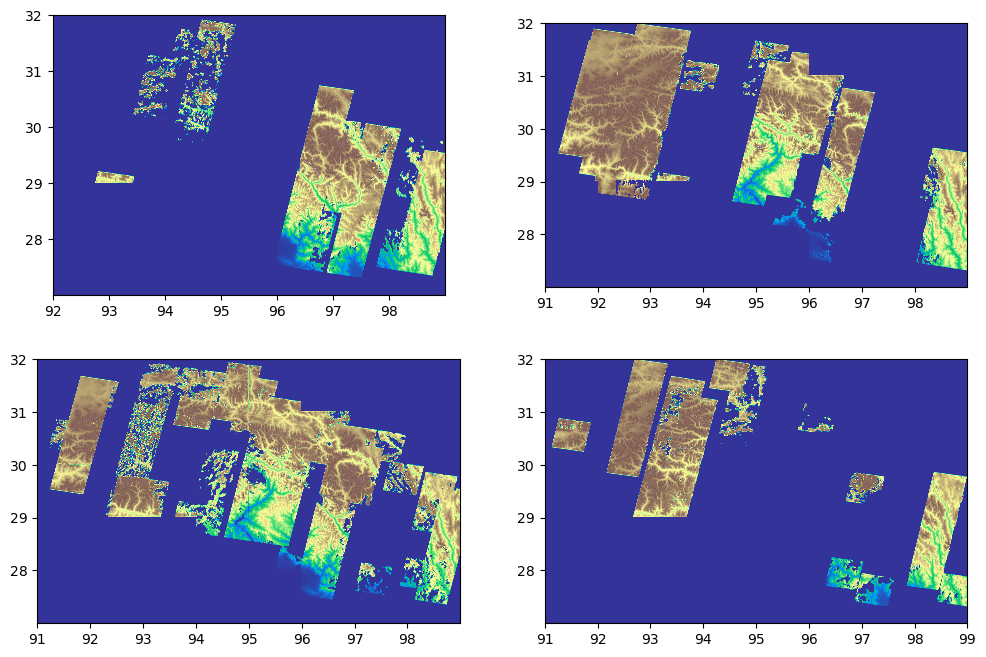

In [11]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(dem_2006, vmax=7000, vmin=1, extent=dem_2006_info['geoextent'], cmap='terrain')
plt.subplot(2,2,2); plt.imshow(dem_2007, vmax=7000, vmin=1, extent=dem_2007_info['geoextent'], cmap='terrain')
plt.subplot(2,2,3); plt.imshow(dem_2008, vmax=7000, vmin=1, extent=dem_2008_info['geoextent'], cmap='terrain')
plt.subplot(2,2,4); plt.imshow(dem_2009, vmax=7000, vmin=1, extent=dem_2009_info['geoextent'], cmap='terrain')


In [12]:
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2018' data/aster-stereo/SETP-2018/tiles-dem/*/dems_mosaic_subs.tif
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2019' data/aster-stereo/SETP-2019/tiles-dem/*/dems_mosaic_subs.tif
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2020' data/aster-stereo/SETP-2020/tiles-dem/*/dems_mosaic_subs.tif
# !gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2021' data/aster-stereo/SETP-2021/tiles-dem/*/dems_mosaic_subs.tif


In [13]:
dem_2018, dem_2018_info = readTiff('dem_setp_2018')
dem_2019, dem_2019_info = readTiff('dem_setp_2019')
dem_2020, dem_2020_info = readTiff('dem_setp_2020')
dem_2021, dem_2021_info = readTiff('dem_setp_2021')
print(dem_2018.shape)


(17379, 27808)


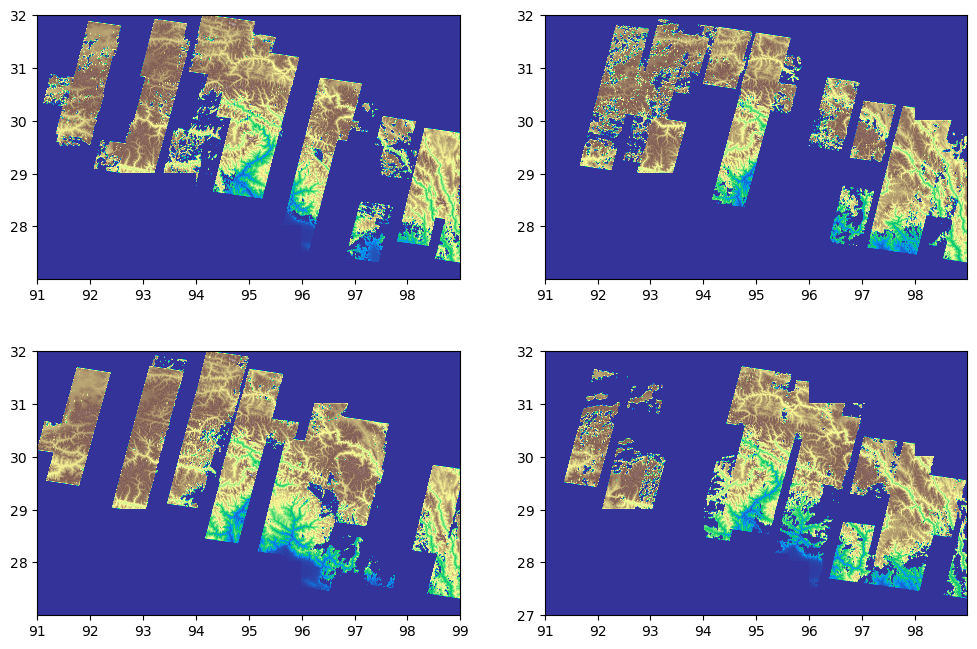

In [10]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(dem_2018, vmax=7000, vmin=1, extent=dem_2018_info['geoextent'], cmap='terrain')
plt.subplot(2,2,2); plt.imshow(dem_2019, vmax=7000, vmin=1, extent=dem_2019_info['geoextent'], cmap='terrain')
plt.subplot(2,2,3); plt.imshow(dem_2020, vmax=7000, vmin=1, extent=dem_2020_info['geoextent'], cmap='terrain')
plt.subplot(2,2,4); plt.imshow(dem_2021, vmax=7000, vmin=1, extent=dem_2021_info['geoextent'], cmap='terrain')


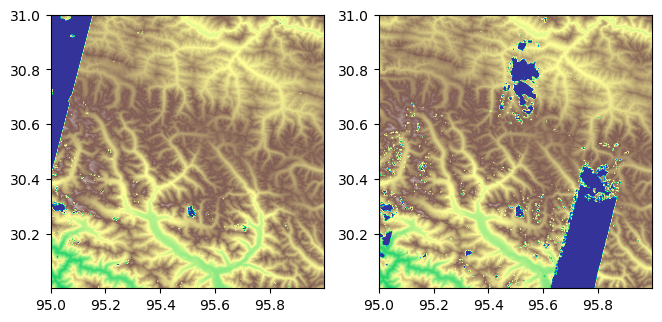

In [15]:
path_2007='data/aster-stereo/SETP-2007/tiles-dem/tile-30-95/dems_mosaic_subs.tif'
path_2021='data/aster-stereo/SETP-2021/tiles-dem/tile-30-95/dems_mosaic_subs.tif'
dem2007, dem2007_info = readTiff(path_2007)
dem2021, dem2021_info = readTiff(path_2021)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(dem2007, vmax=7000, vmin=1, extent=dem2007_info['geoextent'], cmap='terrain')
plt.subplot(1,3,2)
plt.imshow(dem2021, vmax=7000, vmin=1, extent=dem2021_info['geoextent'], cmap='terrain')


Images layer stacking done.


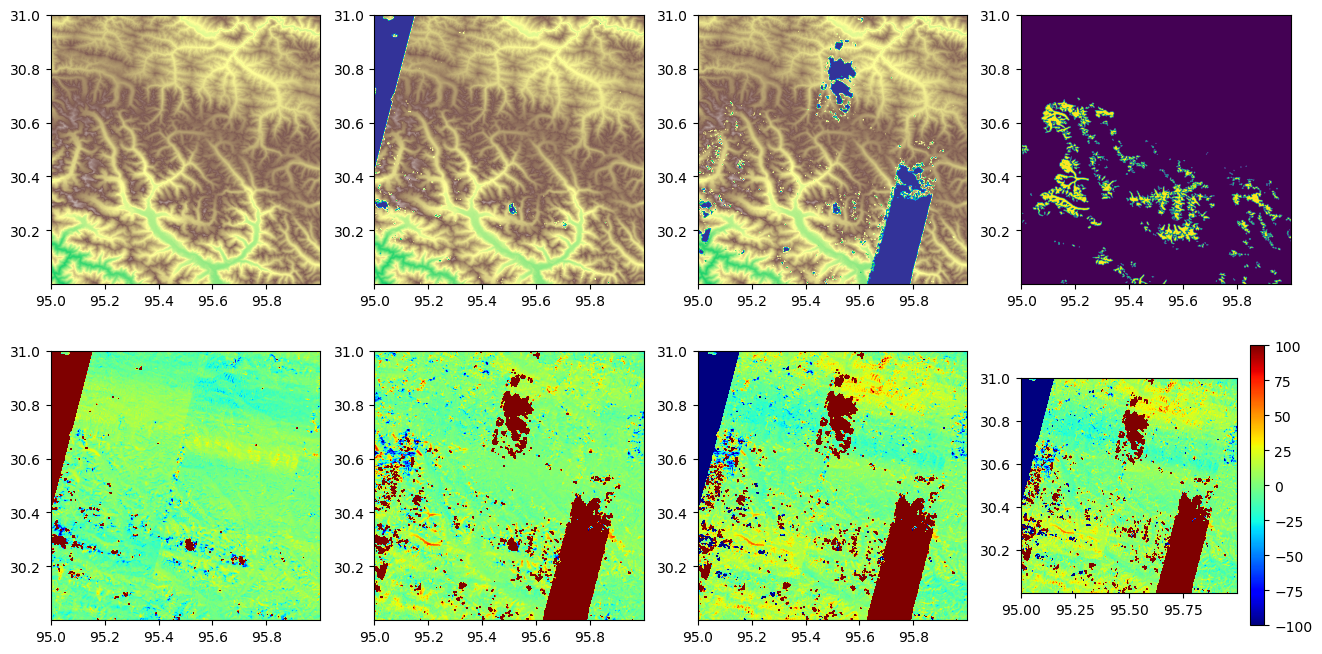

In [17]:
path_srtm='data/dem-data/srtm-c/tiles/tile_30_95.tif'
path_tandem='data/dem-data/tandem-x/TDM1_DEM__30_N30E095_V02_C/DEM/TDM1_DEM__30_N30E095_DEM.tif'
path_2007='data/aster-stereo/SETP-2007/tiles-dem/tile-30-95/dems_mosaic_subs.tif'
path_2021='data/aster-stereo/SETP-2021/tiles-dem/tile-30-95/dems_mosaic_subs.tif'
path_glacier='data/rgi60/tiles/tile_30_95.tif'
lay_stack(path_imgs=[path_srtm, path_2007, path_2021, path_glacier], path_out='dems_laysta.tif', extent_mode='union', res=None)
# lay_stack(path_imgs=[path_tandem, path_2007, path_2021, path_glacier], path_out='dems_laysta.tif', extent_mode='union', res=None)
dems, dems_info = readTiff('dems_laysta.tif')
# dems = dems*dems[:,:,3:4]
tile_dif_1=dems[:,:,0]-dems[:,:,1]
tile_dif_2=dems[:,:,0]-dems[:,:,2]
tile_dif_3=dems[:,:,1]-dems[:,:,2]
plt.figure(figsize=(16,8))
plt.subplot(2,4,1); plt.imshow(dems[:,:,0], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain')
plt.subplot(2,4,2); plt.imshow(dems[:,:,1], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain')
plt.subplot(2,4,3); plt.imshow(dems[:,:,2], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain')
plt.subplot(2,4,4); plt.imshow(dems[:,:,3], extent=dems_info['geoextent'])

plt.subplot(2,4,5); plt.imshow(tile_dif_1, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(2,4,6); plt.imshow(tile_dif_2, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(2,4,7); plt.imshow(tile_dif_3, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(2,4,8); plt.imshow(tile_dif_3, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.colorbar()



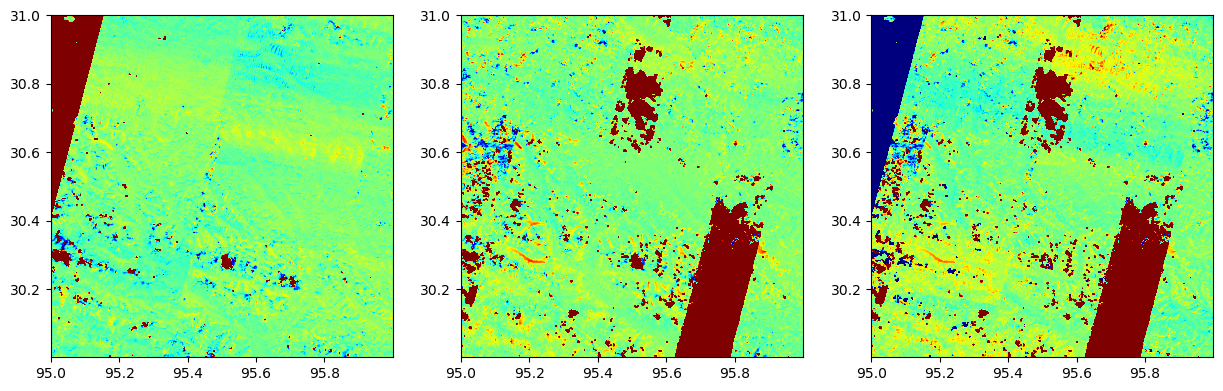

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1); plt.imshow(tile_dif_1, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(1,3,2); plt.imshow(tile_dif_2, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(1,3,3); plt.imshow(tile_dif_3, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')



Images layer stacking done.


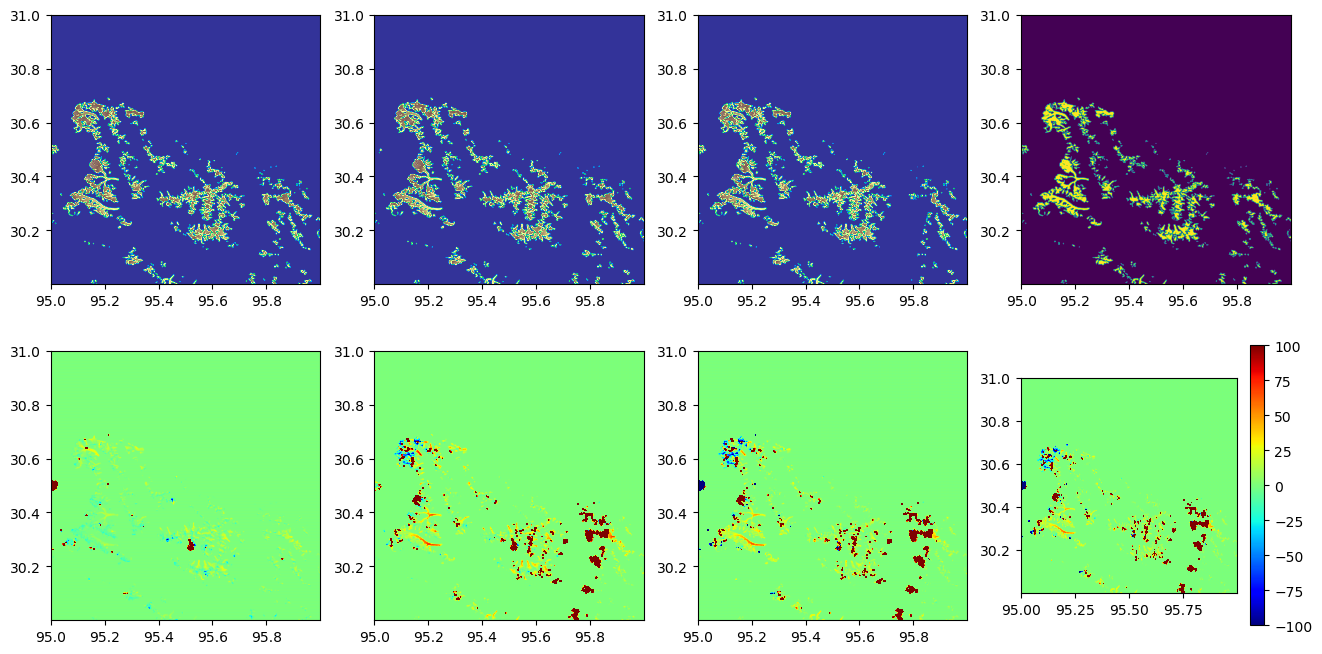

In [24]:
path_srtm='data/dem-data/srtm-c/tiles/tile_30_95.tif'
path_tandem='data/dem-data/tandem-x/TDM1_DEM__30_N30E095_V02_C/DEM/TDM1_DEM__30_N30E095_DEM.tif'
path_2007='data/aster-stereo/SETP-2007/tiles-dem/tile-30-95/dems_mosaic_subs.tif'
path_2021='data/aster-stereo/SETP-2021/tiles-dem/tile-30-95/dems_mosaic_subs.tif'
path_glacier='data/rgi60/tiles/tile_30_95.tif'
lay_stack(path_imgs=[path_srtm, path_2007, path_2021, path_glacier], path_out='dems_laysta.tif', extent_mode='union', res=None)
# lay_stack(path_imgs=[path_tandem, path_2007, path_2021, path_glacier], path_out='dems_laysta.tif', extent_mode='union', res=None)
dems, dems_info = readTiff('dems_laysta.tif')
dems = dems*dems[:,:,3:4]
tile_dif_1=dems[:,:,0]-dems[:,:,1]
tile_dif_2=dems[:,:,0]-dems[:,:,2]
tile_dif_3=dems[:,:,1]-dems[:,:,2]
plt.figure(figsize=(16,8))
plt.subplot(2,4,1); plt.imshow(dems[:,:,0], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain')
plt.subplot(2,4,2); plt.imshow(dems[:,:,1], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain')
plt.subplot(2,4,3); plt.imshow(dems[:,:,2], vmax=7000, vmin=1, extent=dems_info['geoextent'], cmap='terrain')
plt.subplot(2,4,4); plt.imshow(dems[:,:,3], extent=dems_info['geoextent'])
plt.subplot(2,4,5); plt.imshow(tile_dif_1, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(2,4,6); plt.imshow(tile_dif_2, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(2,4,7); plt.imshow(tile_dif_3, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.subplot(2,4,8); plt.imshow(tile_dif_3, vmax=100, vmin=-100, extent=dems_info['geoextent'], cmap='jet')
plt.colorbar()



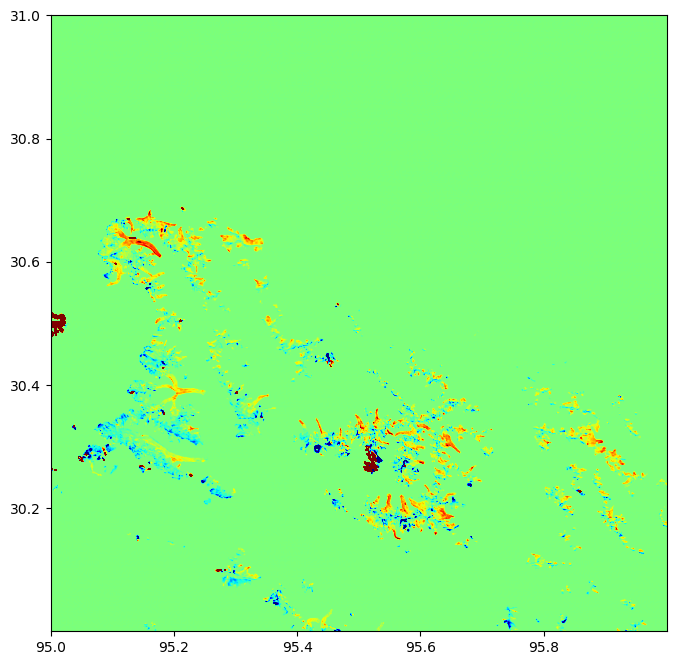

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1,1,1); plt.imshow(tile_dif_1, vmax=40, vmin=-40, extent=dems_info['geoextent'], cmap='jet')

